## 2019년 팀타자

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import tensorflow as tf

In [3]:
p_pit19=pd.read_csv("C:/Users/a/Desktop/2020빅콘/제공데이터/제공데이터(.CSV)_시즌별, 시트별 구분/2020빅콘테스트_스포츠투아이_제공데이터_개인투수_2019.csv",encoding='utf-8',engine='python')
p_bat19=pd.read_csv("C:/Users/a/Desktop/2020빅콘/제공데이터/제공데이터(.CSV)_시즌별, 시트별 구분/2020빅콘테스트_스포츠투아이_제공데이터_개인타자_2019.csv",encoding='utf-8',engine='python')
t_pit19=pd.read_csv("C:/Users/a/Desktop/2020빅콘/제공데이터/제공데이터(.CSV)_시즌별, 시트별 구분/2020빅콘테스트_스포츠투아이_제공데이터_팀투수_2019.csv",encoding='utf-8',engine='python')
t_bat19=pd.read_csv("C:/Users/a/Desktop/2020빅콘/제공데이터/제공데이터(.CSV)_시즌별, 시트별 구분/2020빅콘테스트_스포츠투아이_제공데이터_팀타자_2019.csv",encoding='utf-8',engine='python')
ply19=pd.read_csv("C:/Users/a/Desktop/2020빅콘/제공데이터/제공데이터(.CSV)_시즌별, 시트별 구분/2020빅콘테스트_스포츠투아이_제공데이터_팀타자_2019.csv",encoding='utf-8',engine='python')


In [4]:
#모든 열 다 출력하기
pd.options.display.max_columns=None

In [5]:
#상위 다섯개의 행 표시
t_bat19.head()

,G_ID,GDAY_DS,T_ID,VS_T_ID,HEADER_NO,TB_SC,PA,AB,RBI,RUN,HIT,H2,H3,HR,SB,CS,SH,SF,BB,IB,HP,KK,GD,ERR,LOB,P_HRA_RT,P_AB_CN,P_HIT_CN
0,20190323HHOB0,20190323,HH,OB,0,T,42,34,4,4,12,1,0,0,0,1,1,1,5,0,1,7,2,1,11,0.200000,10,2
1,20190323LGHT0,20190323,HT,LG,0,B,33,28,0,0,3,1,0,0,0,0,1,0,3,0,1,6,1,0,6,0.000000,9,0
2,20190323KTSK0,20190323,KT,SK,0,T,39,36,4,4,9,0,0,1,0,0,0,0,3,0,0,10,1,1,8,0.200000,10,2
3,20190323LGHT0,20190323,LG,HT,0,T,34,31,2,2,8,3,0,0,0,0,0,0,3,0,0,12,3,0,5,0.142857,7,1
4,20190323WOLT0,20190323,LT,WO,0,B,37,35,4,4,7,2,0,0,1,0,0,0,1,0,1,11,0,2,6,0.230769,13,3


In [6]:
#행 개수 세기
len(t_bat19)

1440

In [7]:
#그룹 별 행의 개수 세기(팀코드 별)
t_bat19.groupby('T_ID').size()

T_ID
HH    144
HT    144
KT    144
LG    144
LT    144
NC    144
OB    144
SK    144
SS    144
WO    144
dtype: int64

In [8]:
#타율추가
t_bat19['HIT_RATE']=t_bat19['HIT']/t_bat19['AB']

In [9]:
t_bat19.head()

,G_ID,GDAY_DS,T_ID,VS_T_ID,HEADER_NO,TB_SC,PA,AB,RBI,RUN,HIT,H2,H3,HR,SB,CS,SH,SF,BB,IB,HP,KK,GD,ERR,LOB,P_HRA_RT,P_AB_CN,P_HIT_CN,HIT_RATE
0,20190323HHOB0,20190323,HH,OB,0,T,42,34,4,4,12,1,0,0,0,1,1,1,5,0,1,7,2,1,11,0.200000,10,2,0.352941
1,20190323LGHT0,20190323,HT,LG,0,B,33,28,0,0,3,1,0,0,0,0,1,0,3,0,1,6,1,0,6,0.000000,9,0,0.107143
2,20190323KTSK0,20190323,KT,SK,0,T,39,36,4,4,9,0,0,1,0,0,0,0,3,0,0,10,1,1,8,0.200000,10,2,0.250000
3,20190323LGHT0,20190323,LG,HT,0,T,34,31,2,2,8,3,0,0,0,0,0,0,3,0,0,12,3,0,5,0.142857,7,1,0.258065
4,20190323WOLT0,20190323,LT,WO,0,B,37,35,4,4,7,2,0,0,1,0,0,0,1,0,1,11,0,2,6,0.230769,13,3,0.200000


In [10]:
#팀별 타율(경기별 타율 평균)
팀별타율=t_bat19.filter(['T_ID','VS_T_ID','HIT_RATE'])
팀별타율평균=팀별타율.groupby(['T_ID','VS_T_ID']).mean()
팀별타율평균.tail()

HIT_RATE
T_ID VS_T_ID          
WO   LT       0.293347
     NC       0.250040
     OB       0.266469
     SK       0.269969
     SS       0.304290

In [11]:
#팀별 타율2
팀별타율2=t_bat19.filter(['T_ID','VS_T_ID','AB','HIT'])
팀별타율평균2=팀별타율2.groupby(['T_ID','VS_T_ID']).sum()
팀별타율평균2['HIT_RATE']=팀별타율평균2['HIT']/팀별타율평균2['AB']
팀별타율평균2.tail()

AB  HIT  HIT_RATE
T_ID VS_T_ID                    
WO   LT       556  166  0.298561
     NC       538  137  0.254647
     OB       561  151  0.269162
     SK       556  156  0.280576
     SS       561  176  0.313725

In [12]:
#팀별 경기횟수(16번씩)
팀별경기=t_bat19.filter(['T_ID','VS_T_ID'])
팀별경기횟수=팀별경기.groupby(['T_ID','VS_T_ID']).size()
팀별경기횟수.head(9)

T_ID  VS_T_ID
HH    HT         16
      KT         16
      LG         16
      LT         16
      NC         16
      OB         16
      SK         16
      SS         16
      WO         16
dtype: int64

In [13]:
#조건문으로 행 추출(WO vs SS)
WOSS=t_bat19[(t_bat19['T_ID']=='WO')&(t_bat19['VS_T_ID']=='SS')]
WOSS.head()

,G_ID,GDAY_DS,T_ID,VS_T_ID,HEADER_NO,TB_SC,PA,AB,RBI,RUN,HIT,H2,H3,HR,SB,CS,SH,SF,BB,IB,HP,KK,GD,ERR,LOB,P_HRA_RT,P_AB_CN,P_HIT_CN,HIT_RATE
199,20190416WOSS0,20190416,WO,SS,0,T,42,36,4,4,10,3,0,1,2,2,0,0,6,0,0,7,0,2,11,0.142857,14,2,0.277778
209,20190417WOSS0,20190417,WO,SS,0,T,39,35,5,5,11,3,0,0,0,0,0,1,3,0,0,3,1,1,7,0.285714,14,4,0.314286
219,20190418WOSS0,20190418,WO,SS,0,T,45,38,4,4,8,2,1,0,0,0,1,1,5,1,0,6,3,0,8,0.111111,9,1,0.210526
335,20190503SSWO0,20190503,WO,SS,0,B,42,37,8,8,13,3,0,0,1,0,0,0,5,0,0,9,0,1,10,0.500000,14,7,0.351351
345,20190504SSWO0,20190504,WO,SS,0,B,31,28,1,1,4,1,0,0,0,0,0,0,2,0,1,5,2,0,3,0.250000,4,1,0.142857


In [14]:
len(WOSS)

16

In [15]:
WOSS

,G_ID,GDAY_DS,T_ID,VS_T_ID,HEADER_NO,TB_SC,PA,AB,RBI,RUN,HIT,H2,H3,HR,SB,CS,SH,SF,BB,IB,HP,KK,GD,ERR,LOB,P_HRA_RT,P_AB_CN,P_HIT_CN,HIT_RATE
199,20190416WOSS0,20190416,WO,SS,0,T,42,36,4,4,10,3,0,1,2,2,0,0,6,0,0,7,0,2,11,0.142857,14,2,0.277778
209,20190417WOSS0,20190417,WO,SS,0,T,39,35,5,5,11,3,0,0,0,0,0,1,3,0,0,3,1,1,7,0.285714,14,4,0.314286
219,20190418WOSS0,20190418,WO,SS,0,T,45,38,4,4,8,2,1,0,0,0,1,1,5,1,0,6,3,0,8,0.111111,9,1,0.210526
335,20190503SSWO0,20190503,WO,SS,0,B,42,37,8,8,13,3,0,0,1,0,0,0,5,0,0,9,0,1,10,0.500000,14,7,0.351351
345,20190504SSWO0,20190504,WO,SS,0,B,31,28,1,1,4,1,0,0,0,0,0,0,2,0,1,5,2,0,3,0.250000,4,1,0.142857
355,20190505SSWO0,20190505,WO,SS,0,B,44,38,11,12,17,5,2,0,0,0,0,0,4,0,2,5,3,0,8,0.400000,20,8,0.447368
509,20190524WOSS0,20190524,WO,SS,0,T,44,39,10,10,13,2,1,4,0,0,0,0,5,0,0,8,1,0,7,0.181818,11,2,0.333333
519,20190525WOSS0,20190525,WO,SS,0,T,42,39,9,9,13,3,1,2,1,0,0,0,3,1,0,4,1,1,6,0.400000,10,4,0.333333
529,20190526WOSS0,20190526,WO,SS,0,T,37,30,3,3,6,1,0,0,1,1,0,2,5,0,0,7,0,0,7,0.200000,5,1,0.200000
933,20190716SSWO0,20190716,WO,SS,0,B,35,29,6,6,10,2,1,0,2,1,0,1,5,0,0,5,3,0,5,0.428571,7,3,0.344828


연속된 경기에서 타율차이가 매우 클 수 있음(연속된 날짜x)

-> 상대팀을 보는 것이 맞는지 의문
>20190825WOSS0 와 20190905SSWO0 의 결정적 차이가 무엇인지 파악해야할 듯

In [16]:
#8.25 WO vs SS 개인타자 (WO 타율 0.489)
p_bat_0825WOSS=p_bat19[p_bat19['G_ID']=='20190825WOSS0']

#8.25 WO vs SS 개인투수 (WO 타율 0.489)
p_pit_0825WOSS=p_pit19[p_pit19['G_ID']=='20190825WOSS0']

In [17]:
#WO 개인타자 (WO 타율 0.489)
p_bat_0825WOSS[p_bat_0825WOSS['T_ID']=='WO']

,G_ID,GDAY_DS,T_ID,VS_T_ID,HEADER_NO,TB_SC,P_ID,START_CK,BAT_ORDER_NO,PA,AB,RBI,RUN,HIT,H2,H3,HR,SB,CS,SH,SF,BB,IB,HP,KK,GD,ERR,LOB,P_HRA_RT,P_AB_CN,P_HIT_CN
14382,20190825WOSS0,20190825,WO,SS,0,T,62353,1,2,7,4,2,3,2,0,1,0,0,0,0,0,2,0,1,0,1,0,2,0.666667,3,2
14383,20190825WOSS0,20190825,WO,SS,0,T,62356,1,7,7,6,2,2,3,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0.250000,4,1
14387,20190825WOSS0,20190825,WO,SS,0,T,64300,1,3,6,5,4,2,1,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0.250000,4,1
14388,20190825WOSS0,20190825,WO,SS,0,T,64346,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.000000,1,0
14391,20190825WOSS0,20190825,WO,SS,0,T,65357,1,6,7,7,1,1,3,1,0,0,0,0,0,0,0,0,0,1,1,0,2,0.333333,6,2
14393,20190825WOSS0,20190825,WO,SS,0,T,67304,1,9,6,5,2,3,4,1,0,0,1,0,0,0,1,0,0,0,0,0,2,1.000000,3,3
14394,20190825WOSS0,20190825,WO,SS,0,T,67341,1,1,6,4,3,2,1,1,0,0,0,0,0,0,2,0,0,0,0,0,0,0.333333,3,1
14396,20190825WOSS0,20190825,WO,SS,0,T,68345,1,5,7,3,2,2,2,1,0,0,0,0,0,0,4,0,0,0,0,0,3,0.500000,2,1
14399,20190825WOSS0,20190825,WO,SS,0,T,75125,1,4,6,5,2,1,3,2,0,0,0,0,0,0,1,0,0,1,0,0,2,0.500000,2,1
14401,20190825WOSS0,20190825,WO,SS,0,T,79300,0,3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.000000,0,0


In [18]:
#SS 개인 투수 (WO 타율 0.489)
p_pit_0825WOSS[p_pit_0825WOSS['T_ID']=='SS']

,G_ID,GDAY_DS,T_ID,VS_T_ID,HEADER_NO,TB_SC,P_ID,START_CK,RELIEF_CK,CG_CK,QUIT_CK,WLS,HOLD,INN2,BF,PA,AB,HIT,H2,H3,HR,SB,CS,SH,SF,BB,IB,HP,KK,GD,WP,BK,ERR,R,ER,P_WHIP_RT,P2_WHIP_RT,CB_WHIP_RT
5142,20190825WOSS0,20190825,SS,WO,0,B,61365,0,1,0,0,,0,6,55,16,14,8,1,0,1,0,0,0,0,1,0,1,1,0,0,0,0,7,7,3.0,0.0,6.0
5144,20190825WOSS0,20190825,SS,WO,0,B,61457,0,1,0,1,,0,4,25,7,6,2,1,0,0,0,0,0,0,1,0,0,3,0,0,0,0,1,1,1.5,0.0,6.0
5146,20190825WOSS0,20190825,SS,WO,0,B,66451,0,1,0,0,,0,2,17,6,2,1,0,0,0,0,0,0,0,3,0,1,0,1,0,0,0,2,2,3.0,0.0,0.0
5149,20190825WOSS0,20190825,SS,WO,0,B,67421,0,1,0,0,,0,6,31,10,8,4,1,0,0,0,0,0,0,2,0,0,0,2,0,0,0,2,2,1.5,0.0,6.0
5150,20190825WOSS0,20190825,SS,WO,0,B,67467,0,1,0,0,,0,3,22,5,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0
5151,20190825WOSS0,20190825,SS,WO,0,B,69439,1,0,0,0,L,0,6,49,17,13,7,4,1,0,1,0,1,0,2,0,1,2,0,0,0,0,9,9,3.6,5.0,2.0


## LG 경기....

In [19]:
LG=t_bat19[t_bat19['T_ID']=='LG']

In [20]:
LG.head(20)

,G_ID,GDAY_DS,T_ID,VS_T_ID,HEADER_NO,TB_SC,PA,AB,RBI,RUN,HIT,H2,H3,HR,SB,CS,SH,SF,BB,IB,HP,KK,GD,ERR,LOB,P_HRA_RT,P_AB_CN,P_HIT_CN,HIT_RATE
3,20190323LGHT0,20190323,LG,HT,0,T,34,31,2,2,8,3,0,0,0,0,0,0,3,0,0,12,3,0,5,0.142857,7,1,0.258065
13,20190324LGHT0,20190324,LG,HT,0,T,46,40,8,9,12,3,0,2,1,1,0,0,6,0,0,5,0,0,10,0.272727,11,3,0.300000
23,20190326LGSK0,20190326,LG,SK,0,T,38,31,6,6,5,2,0,1,0,0,0,1,5,0,1,2,0,0,5,0.285714,7,2,0.161290
33,20190327LGSK0,20190327,LG,SK,0,T,46,40,0,1,9,1,0,0,1,0,0,0,6,0,0,10,2,1,12,0.166667,12,2,0.225000
43,20190328LGSK0,20190328,LG,SK,0,T,30,29,1,1,2,0,0,1,0,0,0,0,1,0,0,9,0,0,2,0.000000,0,0,0.068966
53,20190329LTLG0,20190329,LG,LT,0,B,35,29,2,2,6,2,0,1,0,0,0,0,5,0,1,9,1,0,9,0.076923,13,1,0.206897
63,20190330LTLG0,20190330,LG,LT,0,B,35,30,1,1,3,0,0,0,2,0,0,1,3,0,1,11,0,1,7,0.000000,6,0,0.100000
73,20190331LTLG0,20190331,LG,LT,0,B,44,41,5,6,12,2,0,0,2,0,0,0,2,0,1,5,1,0,10,0.428571,14,6,0.292683
83,20190402LGHH0,20190402,LG,HH,0,T,34,30,2,2,6,0,0,0,1,0,0,0,4,0,0,10,3,1,5,0.400000,5,2,0.200000
93,20190403LGHH0,20190403,LG,HH,0,T,44,36,6,7,11,1,0,1,2,0,1,1,5,0,1,8,0,0,10,0.181818,11,2,0.305556


In [21]:
len(LG)

144

In [22]:
#LG.columns[[0,1,2,3,4,5]]

In [23]:
LG=LG.drop(LG.columns[[0,1,2,3,4,5]],axis='columns')
LG.head()

,PA,AB,RBI,RUN,HIT,H2,H3,HR,SB,CS,SH,SF,BB,IB,HP,KK,GD,ERR,LOB,P_HRA_RT,P_AB_CN,P_HIT_CN,HIT_RATE
3,34,31,2,2,8,3,0,0,0,0,0,0,3,0,0,12,3,0,5,0.142857,7,1,0.258065
13,46,40,8,9,12,3,0,2,1,1,0,0,6,0,0,5,0,0,10,0.272727,11,3,0.300000
23,38,31,6,6,5,2,0,1,0,0,0,1,5,0,1,2,0,0,5,0.285714,7,2,0.161290
33,46,40,0,1,9,1,0,0,1,0,0,0,6,0,0,10,2,1,12,0.166667,12,2,0.225000
43,30,29,1,1,2,0,0,1,0,0,0,0,1,0,0,9,0,0,2,0.000000,0,0,0.068966


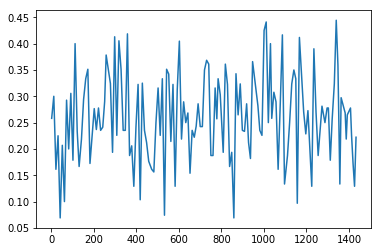

In [24]:
LG['HIT_RATE'][:].plot()

In [25]:
#예측을 위한 목표 데이터
shift_steps=16
target_names=['AB','HIT','HIT_RATE']

In [26]:
LG_targets=LG[target_names].shift(-shift_steps) #미래 데이터 예측이므로 -이동

In [27]:
#원본 데이터 첫번째 shift_steps+5행
LG[target_names].head(shift_steps+5)

,AB,HIT,HIT_RATE
3,31,8,0.258065
13,40,12,0.300000
23,31,5,0.161290
33,40,9,0.225000
43,29,2,0.068966
53,29,6,0.206897
63,30,3,0.100000
73,41,12,0.292683
83,30,6,0.200000
93,36,11,0.305556


In [28]:
#교차이동된 데이터 처음5행(원래 데이터 마지막 5행과 일치)
LG_targets.head()

,AB,HIT,HIT_RATE
3,30.0,10.0,0.333333
13,37.0,13.0,0.351351
23,29.0,5.0,0.172414
33,40.0,9.0,0.225000
43,47.0,13.0,0.276596


In [29]:
#데이터가 거꾸로 이동했으므로 마지막 관측치는 NAN(존재하지 않는 데이터를 역방향으로 교차이동)
LG_targets.tail()

,AB,HIT,HIT_RATE
1407,NaN,NaN,NaN
1412,NaN,NaN,NaN
1419,NaN,NaN,NaN
1426,NaN,NaN,NaN
1433,NaN,NaN,NaN


## NumPy 배열

대상 데이터가 이동된 기간에 대해 NaN값이 들어있기 때문에 배열 마지막 부분을 제거하고, 입출력 데이터에 동일한 배열 모양이 필요

In [30]:
#입력신호
x_data=LG.values[0:-shift_steps]

In [31]:
print(type(x_data))
print("Shape:",x_data.shape)

<class 'numpy.ndarray'>
Shape: (128, 23)


In [32]:
#출력신호
y_data=LG_targets.values[:-shift_steps]

In [33]:
print(type(y_data))
print("Shape:",y_data.shape)

<class 'numpy.ndarray'>
Shape: (128, 3)


In [34]:
#데이터 세트의 관측 수(128)
num_data=len(x_data)
num_data

128

In [35]:
#학습용 세트에 사용될 데이터 세트 일부
train_split=0.9

#학습용 세트의 관측수
num_train=int(train_split*num_data)
num_train

115

In [36]:
#테스트 세트의 관측수
num_test = num_data - num_train
num_test

13

In [37]:
#학습 및 테스트 세트 입력신호
x_train = x_data[0:num_train]
x_test = x_data[num_train:]
len(x_train) + len(x_test)

128

In [38]:
#학습 및 테스트 세트의 출력신호
y_train = y_data[0:num_train]
y_test = y_data[num_train:]
len(y_train) + len(y_test)

128

In [39]:
#입력 신호의 수
num_x_signals = x_data.shape[1]
num_x_signals

23

In [40]:
#출력 신호의 수
num_y_signals = y_data.shape[1]
num_y_signals

3

### 데이터 구간 조정

In [41]:
print("Min:", np.min(x_train))
print("Max:", np.max(x_train))

Min: 0.0
Max: 56.0


신경망은 -1에서 1사이에서 가장 잘 작동 > 입력 전 데이터 값의 범위 조정

In [42]:
#입력 신호용 스케일러 객체 만들기
from sklearn.preprocessing import MinMaxScaler
x_scaler = MinMaxScaler()

In [43]:
#학습 데이터의 값 범위 값 조정
x_train_scaled = x_scaler.fit_transform(x_train)

In [44]:
#값 조정 완료
print("Min:", np.min(x_train_scaled))
print("Max:", np.max(x_train_scaled))

Min: 0.0
Max: 1.0


In [45]:
x_test_scaled = x_scaler.transform(x_test)

In [46]:
y_scaler = MinMaxScaler()
y_train_scaled = y_scaler.fit_transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

### 데이터 생성기

데이터 세트는 2차원 numpy배열

학습데이터는 20개의 입력 신호와 3개의 출력신호로 구성된 115개의 관측치를 가지고 있음

In [47]:
print(x_train_scaled.shape)
print(y_train_scaled.shape)

(115, 23)
(115, 3)


전체 시퀀스에 대해 RNN 훈련하는 대신 다음과 같은 함수 사용

학습데이터에서 무작위로 선택한 짧은 하위 시퀀스의 배치 만들기

In [48]:
def batch_generator(batch_size, sequence_length):
    # Infinite loop.
    while True:
        # Allocate a new array for the batch of input-signals.
        x_shape = (batch_size, sequence_length, num_x_signals)
        x_batch = np.zeros(shape=x_shape, dtype=np.float16)
        
        # Allocate a new array for the batch of output-signals.
        y_shape = (batch_size, sequence_length, num_y_signals)
        y_batch = np.zeros(shape=y_shape, dtype=np.float16)
        
        # Fill the batch with random sequences of data.
        for i in range(batch_size):
            # Get a random start-index.
            # This points somewhere into the training-data.
            idx = np.random.randint(num_train - sequence_length)

            # Copy the sequences of data starting at this index.
            x_batch[i] = x_train_scaled[idx:idx+sequence_length]
            y_batch[i] = y_train_scaled[idx:idx+sequence_length]

        yield (x_batch, y_batch)

In [49]:
batch_size = 12  #예시에서는 256를 사용함

In [50]:
sequence_length = 16  #또는 9
sequence_length

16

In [51]:
#배치 생성기 만들기
generator = batch_generator(batch_size=batch_size,sequence_length=sequence_length)

In [52]:
#작동되는지 test
x_batch, y_batch = next(generator)

In [53]:
print(x_batch.shape)
print(y_batch.shape)

(12, 16, 23)
(12, 16, 3)


256개의 시퀀스의 무작위 배치 제공

각 시퀀스에는 16개의 관측치가 있고
각 관측치에는 23개의 입력신호와 3개의 출력신호가 있다.

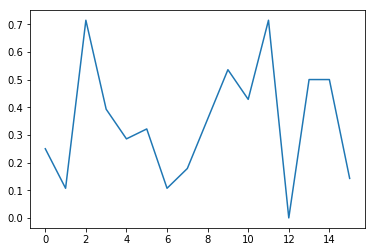

In [54]:
#입력신호 중 하나
batch = 0 # First sequence in the batch.
signal = 0 # First signal from the 23 input-signals.
seq = x_batch[batch, :, signal]
plt.plot(seq)

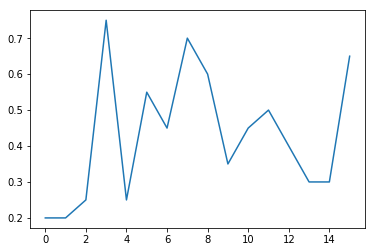

In [55]:
#출력 신호 중 하나(주어진 23개의 입력신호를 학습하여 예측)
seq = y_batch[batch, :, signal]
plt.plot(seq)

### 검증세트

각 에포크 후 테스트 세트에서 모델의 성능을 모니터링하고 테스트 세트에서 성능이 향상되는 경우에만 모델의 가중치를 저장

배치 생성기는 학습 데이터에서 짧은 시퀀스의 배치를 무작위로 선택하여 학습에 사용

유효성 검사 데이터의 경우에는 테스트 세트의 전체 시퀀스를 실행하고 해당 전체 시퀀스의 예측 정확도를 측정

In [56]:
validation_data = (np.expand_dims(x_test_scaled, axis=0),
np.expand_dims(y_test_scaled, axis=0))

## 순환 신경망(RNN) 만들기

In [57]:
from tensorflow.python.keras.models import Sequential
model = Sequential()

In [58]:
from tensorflow.python.keras.layers import Dense,Activation, GRU

model.add(GRU(units=512,return_sequences=True,input_shape=(None, num_x_signals,)))

GRU는 일련의 배치 입력에 대해서 512개의 값을 출력하므로/ 3개의 출력 신호를 예측하기를 원하기 때문에 512개의 값을 3개의 값으로 매핑하는 레이어를 추가

데이터 세트의 출력 신호는 스케일러 객체를 사용하여 0과 1 사이로 제한됨

Sigmoid활성화 함수를 사용하여 신경망의 출력을 제한

In [59]:
model.add(Dense(num_y_signals, activation='sigmoid'))
#시그모이드 활성화 함수를 사용할 때의 문제점은 
#학습 데이터와 동일한 범위의 값만 출력 할 수 있다는 점

In [60]:
if False:
    from tensorflow.python.keras.initializers import RandomUniform
    # Maybe use lower init-ranges.
    init = RandomUniform(minval=-0.05, maxval=0.05)
    model.add(Dense(num_y_signals,
    activation='linear',
    kernel_initializer=init))

### 손실함수(Loss Function)

최소제곱오차(MSE)를 최소화 할 손실 함수로 사용(모델 출력과 실제출력의 일치정도)

초기 시간단계에 손실값을 사용하면 나중에 출력을 왜곡할 수 있으므로 모델의 10번의 시간 단계를 '예열 기간'으로 생각하고, 이 단계의 정확도는 신뢰하지 않음으로써 이후 단계의 정확도를 향상

In [61]:
warmup_steps = 5

In [62]:
def loss_mse_warmup(y_true, y_pred):
    # The shape of both input tensors are:
    # [batch_size, sequence_length, num_y_signals].
    # Ignore the "warmup" parts of the sequences
    # by taking slices of the tensors.
    y_true_slice = y_true[:, warmup_steps:, :]
    y_pred_slice = y_pred[:, warmup_steps:, :]
    # These sliced tensors both have this shape:
    # [batch_size, sequence_length - warmup_steps, num_y_signals]
    # Calculate the MSE loss for each value in these tensors.
    # This outputs a 3-rank tensor of the same shape.
    loss = tf.losses.mean_squared_error(labels=y_true_slice,
    predictions=y_pred_slice)
    # Keras may reduce this across the first axis (the batch)
    # but the semantics are unclear, so to be sure we use
    # the loss across the entire tensor, we reduce it to a
    # single scalar with the mean function.
    loss_mean = tf.reduce_mean(loss)
    return loss_mean

### 모델 컴파일

In [63]:
from tensorflow.python.keras.optimizers import RMSprop
optimizer = RMSprop(lr=1e-3)

In [64]:
model.compile(loss=loss_mse_warmup, optimizer=optimizer)

In [65]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, None, 512)         823296    
_________________________________________________________________
dense (Dense)                (None, None, 3)           1539      
Total params: 824,835
Trainable params: 824,835
Non-trainable params: 0
_________________________________________________________________


두개의 레이어만 있는 작은 모델임

In [66]:
from tensorflow.python.keras import callbacks

In [67]:
from tensorflow.python.keras.callbacks import ModelCheckpoint,EarlyStopping,TensorBoard,ReduceLROnPlateau
#학습 중에 체크포인트를 기록하는 콜백
path_checkpoint = '23_checkpoint.keras'
callback_checkpoint = ModelCheckpoint(filepath=path_checkpoint,monitor='val_loss',
                        verbose=1,save_weights_only=True,save_best_only=True)

In [68]:
#유효성 검사 집합에서 성능이 악화될 때 최적화를 중지하기 위한 콜백
callback_early_stopping = EarlyStopping(monitor='val_loss',patience=5, verbose=1)

In [69]:
#교육 중 TensorBorad 로그를 작성하기 위한 콜백
callback_tensorboard = TensorBoard(log_dir='./23_logs/',histogram_freq=0,
                                   write_graph=False)

In [70]:
callback_reduce_lr = ReduceLROnPlateau(monitor='val_loss',factor=0.1,
                                       min_lr=1e-4,patience=0,verbose=1)

In [71]:
callbacks = [callback_early_stopping,callback_checkpoint,
             callback_tensorboard,callback_reduce_lr]

## 순환 신경망 학습

In [72]:
%%time
model.fit_generator(generator=generator,epochs=20,steps_per_epoch=100,
                    validation_data=validation_data,callbacks=callbacks)

Epoch 1/20
 99/100 [============================>.] - ETA: 0s - loss: 0.0299
Epoch 00001: val_loss improved from inf to 0.05598, saving model to 23_checkpoint.keras
100/100 [==============================] - 32s 323ms/step - loss: 0.0299 - val_loss: 0.0560
Epoch 2/20
 99/100 [============================>.] - ETA: 0s - loss: 0.0063
Epoch 00002: val_loss did not improve from 0.05598

Epoch 00002: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
100/100 [==============================] - 29s 286ms/step - loss: 0.0063 - val_loss: 0.0731
Epoch 3/20
 99/100 [============================>.] - ETA: 0s - loss: 0.0014
Epoch 00003: val_loss did not improve from 0.05598

Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.0001.
100/100 [==============================] - 28s 278ms/step - loss: 0.0014 - val_loss: 0.0689
Epoch 4/20
 99/100 [============================>.] - ETA: 0s - loss: 8.8576e-04
Epoch 00004: val_loss did not improve from 0.05598
100/100 [==============

In [73]:
try:
    model.load_weights(path_checkpoint)
except Exception as error:
    print("Error trying to load checkpoint.")
    print(error)

## 테스트 세트에 대한 성능

In [74]:
result = model.evaluate(x=np.expand_dims(x_test_scaled, axis=0),
                        y=np.expand_dims(y_test_scaled, axis=0))

1/1 [==============================] - 0s 26ms/step


In [75]:
print("loss (test-set):", result)

loss (test-set): 0.05597943067550659


In [76]:
# 만약 여러가지 측정치를 사용한다면 다음의 방법으로 측정할 수 있습니다.
if False:
    for res, metric in zip(result, model.metrics_names):
        print("{0}: {1:.3e}".format(metric, res))

## 예측값 만들기

In [77]:
def plot_comparison(start_idx, length=100, train=True):
    if train:
        # Use training-data.
        x = x_train_scaled
        y_true = y_train
    else:
        # Use test-data.
        x = x_test_scaled
        y_true = y_test

    # End-index for the sequences.
    end_idx = start_idx + length

    # Select the sequences from the given start-index and
    # of the given length.
    x = x[start_idx:end_idx]
    y_true = y_true[start_idx:end_idx]

    # Input-signals for the model.
    x = np.expand_dims(x, axis=0)
    # Use the model to predict the output-signals.
    y_pred = model.predict(x)

    # The output of the model is between 0 and 1.
    # Do an inverse map to get it back to the scale
    # of the original data-set.
    y_pred_rescaled = y_scaler.inverse_transform(y_pred[0])

    # For each output-signal.
    for signal in range(len(target_names)):
        # Get the output-signal predicted by the model.
        signal_pred = y_pred_rescaled[:, signal]

        # Get the true output-signal from the data-set.
        signal_true = y_true[:, signal]
        # Make the plotting-canvas bigger.
        plt.figure(figsize=(15,5))

        # Plot and compare the two signals.
        plt.plot(signal_true, label='true')
        plt.plot(signal_pred, label='pred')

        # Plot grey box for warmup-period.
        p = plt.axvspan(0, warmup_steps, facecolor='black', alpha=0.15
        )

        # Plot labels etc.
        plt.ylabel(target_names[signal])
        plt.legend()
        plt.show()

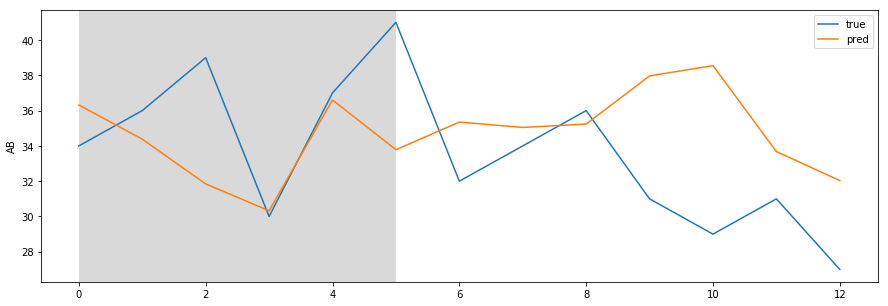

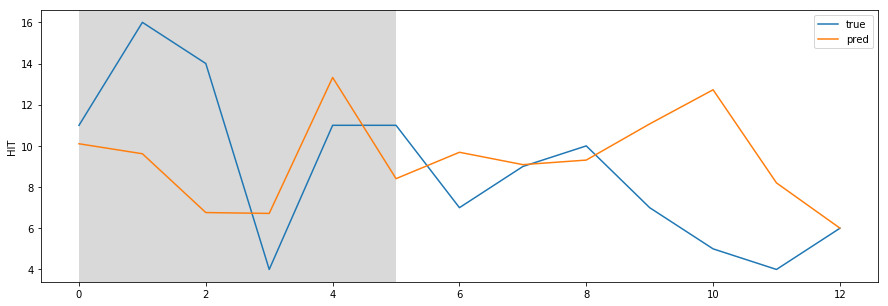

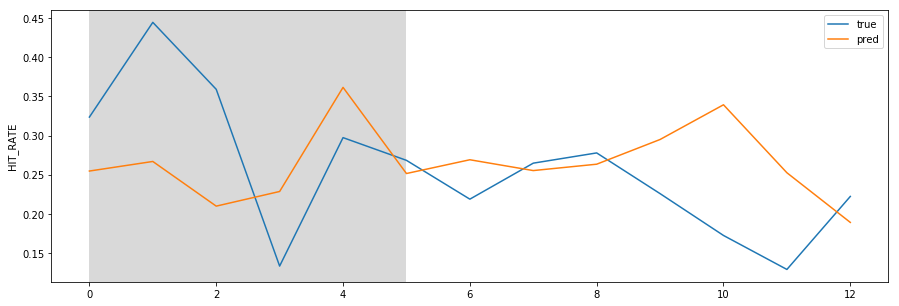

In [78]:
plot_comparison(start_idx=0, length=15, train=False)

In [79]:
len(x_train_scaled)

115

In [80]:
x_test_scaled

array([[0.25      , 0.2       , 0.125     , 0.11764706, 0.05882353,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.5       , 0.        , 0.11111111, 0.        , 0.5       ,
        0.5625    , 0.        , 0.        , 0.3125    , 0.44444444,
        0.25      , 0.22222222, 0.07471214],
       [0.46428571, 0.35      , 0.4375    , 0.47058824, 0.70588235,
        0.14285714, 0.        , 0.66666667, 0.25      , 0.        ,
        0.5       , 0.33333333, 0.33333333, 0.33333333, 0.5       ,
        0.3125    , 0.33333333, 0.        , 0.5       , 0.60606061,
        0.45833333, 0.55555556, 0.92098093],
       [0.57142857, 0.7       , 0.75      , 0.70588235, 0.70588235,
        0.42857143, 0.        , 0.33333333, 0.        , 0.        ,
        0.        , 0.        , 0.22222222, 0.        , 0.25      ,
        0.375     , 0.        , 0.        , 0.4375    , 0.66666667,
        0.58333333, 0.77777778, 0.73210607],
       [0.42857143, 0.5       , 0.1875    , 0.176